In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cifar10_data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [15]:
# https://en.wikipedia.org/wiki/CIFAR-10
image_categories = ['airplanes',
 'cars',
 'birds',
 'cats',
 'deer',
 'dogs',
 'frogs',
 'horses',
 'ships',
 'trucks']

In [3]:
type(cifar10_data)

tuple

In [4]:
((x_train, y_train), (x_test, y_test)) = cifar10_data

In [5]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
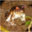

In [6]:
x_train[0]

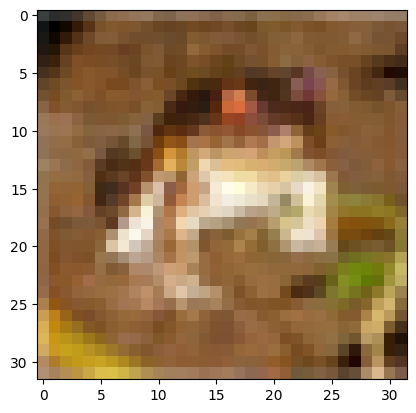

In [8]:
plt.imshow(x_train[0])

In [14]:
y_train[0], image_categories[int(y_train[0])]

/tmp/ipython-input-346066577.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_train[0], image_categories[int(y_train[0])]


(array([6], dtype=uint8), 'frogs')

In [18]:
set(y_train.flatten())

{np.uint8(0),
 np.uint8(1),
 np.uint8(2),
 np.uint8(3),
 np.uint8(4),
 np.uint8(5),
 np.uint8(6),
 np.uint8(7),
 np.uint8(8),
 np.uint8(9)}

In [19]:
### TODO: crearea altor imagini

In [25]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal_and_vertical"),
        tf.keras.layers.RandomRotation(0.2),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomContrast(0.2),
        tf.keras.layers.RandomTranslation(0.1, 0.1),
    ]
)

In [26]:
x_train[0].shape


(32, 32, 3)

In [28]:
entire_model = tf.keras.Sequential(
    [
        ## INPUT
        tf.keras.Input(shape=(32, 32, 3)),
        # Layer Secvential de distorsionare random a imaginilor
        data_augmentation,
        # CNN
        tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),


        tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),

        # [[], []] -> []
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2), # Random. - 20% dintre neuroni sunt dezactivati
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(10, activation="softmax"),
    ]
)
entire_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
entire_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 323,338 (1.23 MB)

 Trainable params: 323,338 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
28 * 28

784

In [31]:
stop_in_3_epochs = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=3,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
)

In [32]:
model_history = entire_model.fit(x_train, y_train, batch_size=32, epochs=10, callbacks=[stop_in_3_epochs], validation_split=0.1)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 77s 53ms/step - accuracy: 0.1714 - loss: 3.1614 - val_accuracy: 0.2738 - val_loss: 1.9810
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 53ms/step - accuracy: 0.2752 - loss: 1.9516 - val_accuracy: 0.2962 - val_loss: 1.8949
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.3113 - loss: 1.8719 - val_accuracy: 0.3424 - val_loss: 1.7711
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.3230 - loss: 1.8362 - val_accuracy: 0.3500 - val_loss: 1.7611
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 52ms/step - accuracy: 0.3364 - loss: 1.8046 - val_accuracy: 0.3706 - val_loss: 1.7282
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 71s 51ms/step - accuracy: 0.3467 - loss: 1.7948 - val_accuracy: 0.3940 - val_loss: 1.6576
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 73s 52ms/step - accuracy: 0.3663 - loss: 1.7505 - val_accuracy: 0.4072 - val_loss: 1.6491
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 81s 51ms/step - accuracy: 0.3712 -